### `Import Libraries`

In [ ]:
# Major
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## TensorFlow
import tensorflow as tf
tf.random.set_seed(2024)

In [ ]:
tf.__version__

'2.15.0'

### `Classifiction NN`

### `Load the Dataset`

In [ ]:
## loading the Fashion MNIST -> embedded in TensorFlow
tf.random.set_seed(2024)
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [ ]:
X_train_full.max()

255

### `Data Processing`

In [ ]:
## Normalizing and Transfer datatypes to (float32 & int32, enough for NN)
X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')
np.unique(y_train_full)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [ ]:
X_train_full.max()

9.274685e-13

In [ ]:
X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

### `Split the Dataset`

In [ ]:
## Split train to train & valid
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.1, shuffle=True, stratify=y_train_full)

print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)

print('----'*10)

print('X_val shape =>', X_valid.shape)
print('y_val shape =>', y_valid.shape)

print('----'*10)

print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)

X_train shape => (54000, 28, 28)
y_train shape => (54000,)
----------------------------------------
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
----------------------------------------
X_test shape => (10000, 28, 28)
y_test shape => (10000,)


### `Getting Labels`

In [ ]:
## What about the target
## Each target is represented by numbers , If we plot these matrices according to its numbers
## we will get the corresponding photo to each number , I will do that

In [ ]:
X_train[0].shape

(28, 28)

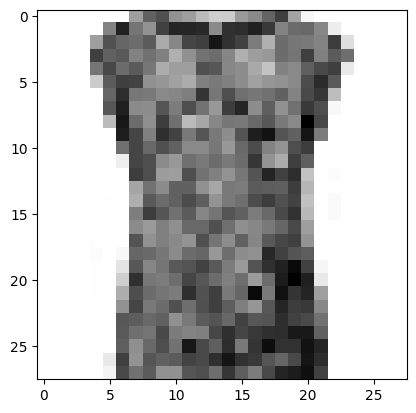

In [ ]:
# Just an exmaple
plt.imshow(X_train[0], cmap='binary');

In [ ]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])
target_only_plot

,target
0,6
1,4
2,5
3,4
4,4
...,...
53995,6
53996,9
53997,6
53998,9


In [ ]:
## Get one unique label with its index in dataset
## Get first unique value only. What this number belong to what photo
img_indicies = {}   # label: index
for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]
img_indicies

{0: 6, 1: 14, 2: 7, 3: 5, 4: 1, 5: 2, 6: 0, 7: 28, 8: 8, 9: 13}

In [ ]:
keys = list(img_indicies.keys())
keys

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
y_train[6]

0

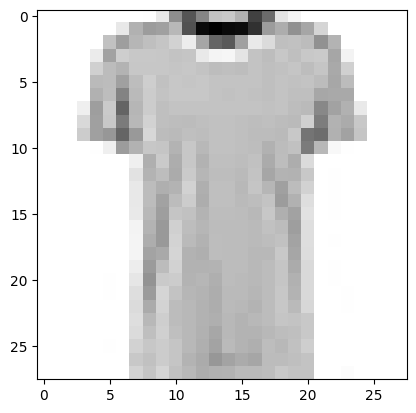

In [ ]:
## Now as an exmaple
plt.imshow(X_train[img_indicies[0]], cmap='binary')

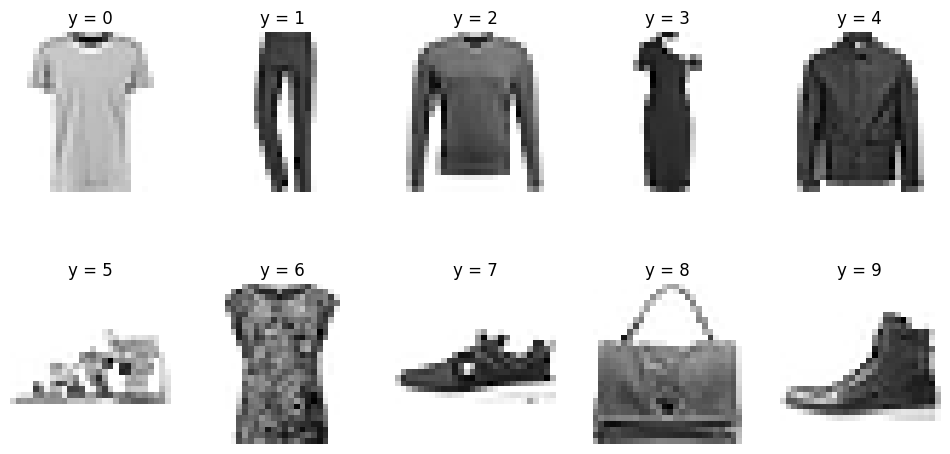

In [ ]:
## Plotting
fig, ax = plt.subplots(2, 5, figsize=(12, 6))

label = 0
for row in range(2):
  for col in range(5):
    plt.sca(ax[row, col])
    plt.imshow(X_train[img_indicies[label]], cmap='binary')
    plt.title(f'y = {keys[label]}', fontsize=12, c='k')
    plt.axis('off')
    label += 1

In [ ]:
### you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle_Boot']


## you can now work like this
print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 6
get its corresponding class => Shirt


### `Building Sequential Model`

In [ ]:
## Model but flatten firstly as we want to use only ANN (Dense) not Conv
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
## show the layers
model.layers

In [ ]:
## bias and weights ==> initialization
## we will look at many initialization techniques later, by default it is (glorot_uniform) init.
weights, biases = model.layers[1].get_weights()
weights.shape

(784, 128)

In [ ]:
biases.shape

(128,)

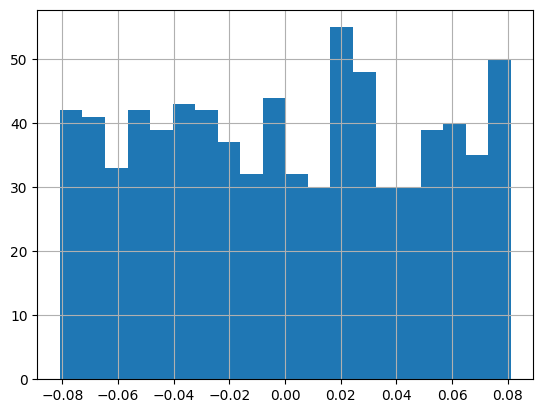

In [ ]:
## Choose any features to show
pd.DataFrame(weights).iloc[:, 5].hist(bins=20);

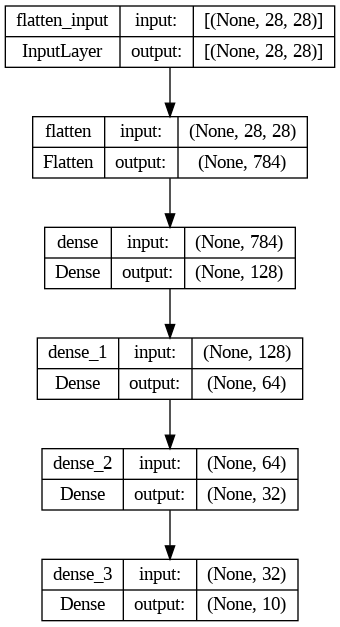

In [ ]:
## Plot the model
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
tf.keras.optimizers.SGD()

In [ ]:
## Early Stopping (Optional) callback to reduce overfitting
early_stopp = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=7, restore_best_weights=True)

## Compiling
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', #tf.keras.optimizers.SGD
              metrics=['accuracy'])
## Training
history = model.fit(X_train, y_train,
                    validation_data=(X_valid, y_valid), epochs=20, batch_size=32,
                    callbacks=[early_stopp])

Epoch 1/20
1688/1688 [==============================] - 15s 7ms/step - loss: 0.8258 - accuracy: 0.7151 - val_loss: 0.5926 - val_accuracy: 0.7870
Epoch 2/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.5163 - accuracy: 0.8169 - val_loss: 0.5022 - val_accuracy: 0.8248
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4602 - accuracy: 0.8364 - val_loss: 0.4476 - val_accuracy: 0.8422
Epoch 4/20
1688/1688 [==============================] - 6s 3ms/step - loss: 0.4280 - accuracy: 0.8489 - val_loss: 0.4097 - val_accuracy: 0.8607
Epoch 5/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4035 - accuracy: 0.8563 - val_loss: 0.4959 - val_accuracy: 0.8202
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3856 - accuracy: 0.8642 - val_loss: 0.3746 - val_accuracy: 0.8725
Epoch 7/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3705 - accuracy: 0.8671 - val_loss: 0.3705 - val_accuracy

In [ ]:
history.history

{'loss': [0.8257995247840881,
  0.5162594318389893,
  0.46018439531326294,
  0.42800554633140564,
  0.40348705649375916,
  0.38558945059776306,
  0.3704654574394226,
  0.35605016350746155,
  0.34509292244911194,
  0.3358123302459717,
  0.3257409632205963,
  0.318219393491745,
  0.311744749546051,
  0.3040628731250763,
  0.29775476455688477,
  0.29130294919013977,
  0.28564801812171936,
  0.27941203117370605,
  0.2751508355140686,
  0.27093079686164856],
 'accuracy': [0.7150740623474121,
  0.816870391368866,
  0.836388885974884,
  0.8489444255828857,
  0.8562963008880615,
  0.8642407655715942,
  0.8671481609344482,
  0.8719074130058289,
  0.8763333559036255,
  0.8778889179229736,
  0.882018506526947,
  0.8849814534187317,
  0.8863148093223572,
  0.8892037272453308,
  0.8899999856948853,
  0.8922222256660461,
  0.8951481580734253,
  0.8975370526313782,
  0.8995741009712219,
  0.9011296033859253],
 'val_loss': [0.5925880074501038,
  0.5021891593933105,
  0.4475746154785156,
  0.4097130596

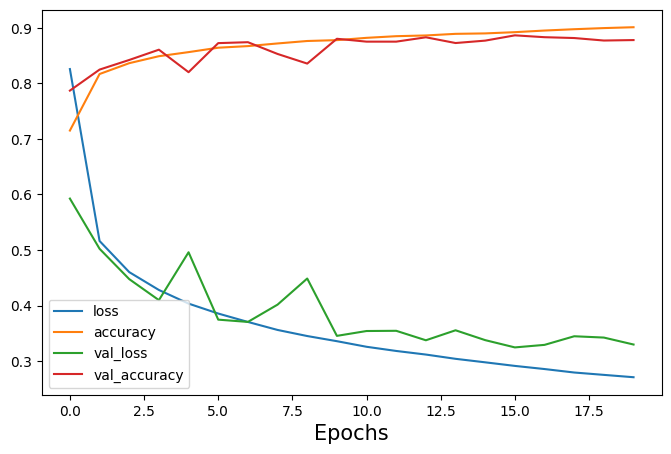

In [ ]:
## Plotting History Results
history_info = history.history
pd.DataFrame(history_info).plot(figsize=(8, 5))
plt.xlabel('Epochs', fontsize=15)
plt.legend(loc='lower left')
plt.show()

### `Evaluating`

1/1 [==============================] - 0s 79ms/step
Predicted Labels:  [9 2 1]

Predicted Class Names:  ['Ankle_Boot', 'Pullover', 'Trouser']


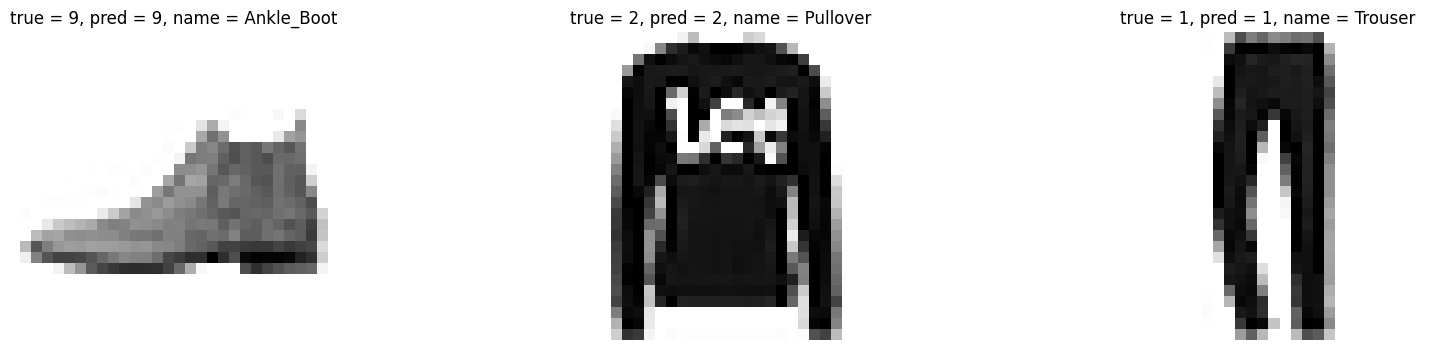

In [ ]:
## Example of sample of new data point
X_new = X_test[:3]
y_new = y_test[:3]

y_pred_new = np.argmax(model.predict(X_new), axis=-1)
print('Predicted Labels: ', y_pred_new)
print()

## To get thier class_names
y_pred_names = [class_names[y_pred_new[i]] for i in range(len(y_pred_new))]
print('Predicted Class Names: ', y_pred_names)

## visualize what we get in this cell
print('==='*25)
fig, ax = plt.subplots(1, 3, figsize=(20, 4))

plt.sca(ax[0])
plt.imshow(X_new[0], cmap='binary')
plt.title(f'true = {y_new[0]}, pred = {y_pred_new[0]}, name = {y_pred_names[0]}')
plt.axis('off')
plt.sca(ax[1])
plt.imshow(X_new[1], cmap='binary')
plt.title(f'true = {y_new[1]}, pred = {y_pred_new[1]}, name = {y_pred_names[1]}')
plt.axis('off')
plt.sca(ax[2])
plt.imshow(X_new[2], cmap='binary')
plt.title(f'true = {y_new[2]}, pred = {y_pred_new[2]}, name = {y_pred_names[2]}')
plt.axis('off');

-----